In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv('airfoil_self_noise.dat',sep='\t',header=None)

In [3]:
df

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,5000,15.6,0.1016,39.6,0.052849,106.224


## This problem has the following inputs:

1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.

In [4]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
df.columns=["Frequency","Angle of attack","Chord length(m)","Free-stream velocity","Suction side","pressure level"]

In [6]:
df.head()

,Frequency,Angle of attack,Chord length(m),Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [7]:
print("Variable present in the DataFrame",df.columns)
print("\n",70*"=")
print("Information about DataFrame: ",df.info())
print("\n",70*"=")
print("Shape of the DataFrame: ",df.shape)
print("\n",70*"=")

Variable present in the DataFrame Index(['Frequency', 'Angle of attack', 'Chord length(m)',
       'Free-stream velocity', 'Suction side', 'pressure level'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Frequency             1503 non-null   int64  
 1   Angle of attack       1503 non-null   float64
 2   Chord length(m)       1503 non-null   float64
 3   Free-stream velocity  1503 non-null   float64
 4   Suction side          1503 non-null   float64
 5   pressure level        1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB
Information about DataFrame:  None

Shape of the DataFrame:  (1503, 6)



Number of missing values each columns:  
 Frequency               0
Angle of attack         0
Chord length(m)         0
Free-stream velocity    0
Suction side            0
pressure level          0
dtype: int64


Percentage of missing value in Frequency               0.0
Angle of attack         0.0
Chord length(m)         0.0
Free-stream velocity    0.0
Suction side            0.0
pressure level          0.0
dtype: float64 %


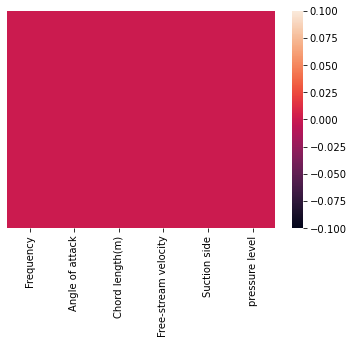

In [8]:
print("Number of missing values each columns: ","\n",df.isnull().sum())

sns.heatmap(df.isnull(), yticklabels=False)

# shows that those column missing values

print("\n")

print("Percentage of missing value in {a} %".format(a=df.isnull().sum()/len(df)))

In [9]:
len(df.columns)

6

In [10]:
df.columns

Index(['Frequency', 'Angle of attack', 'Chord length(m)',
       'Free-stream velocity', 'Suction side', 'pressure level'],
      dtype='object')

'Distribution of the dataset'

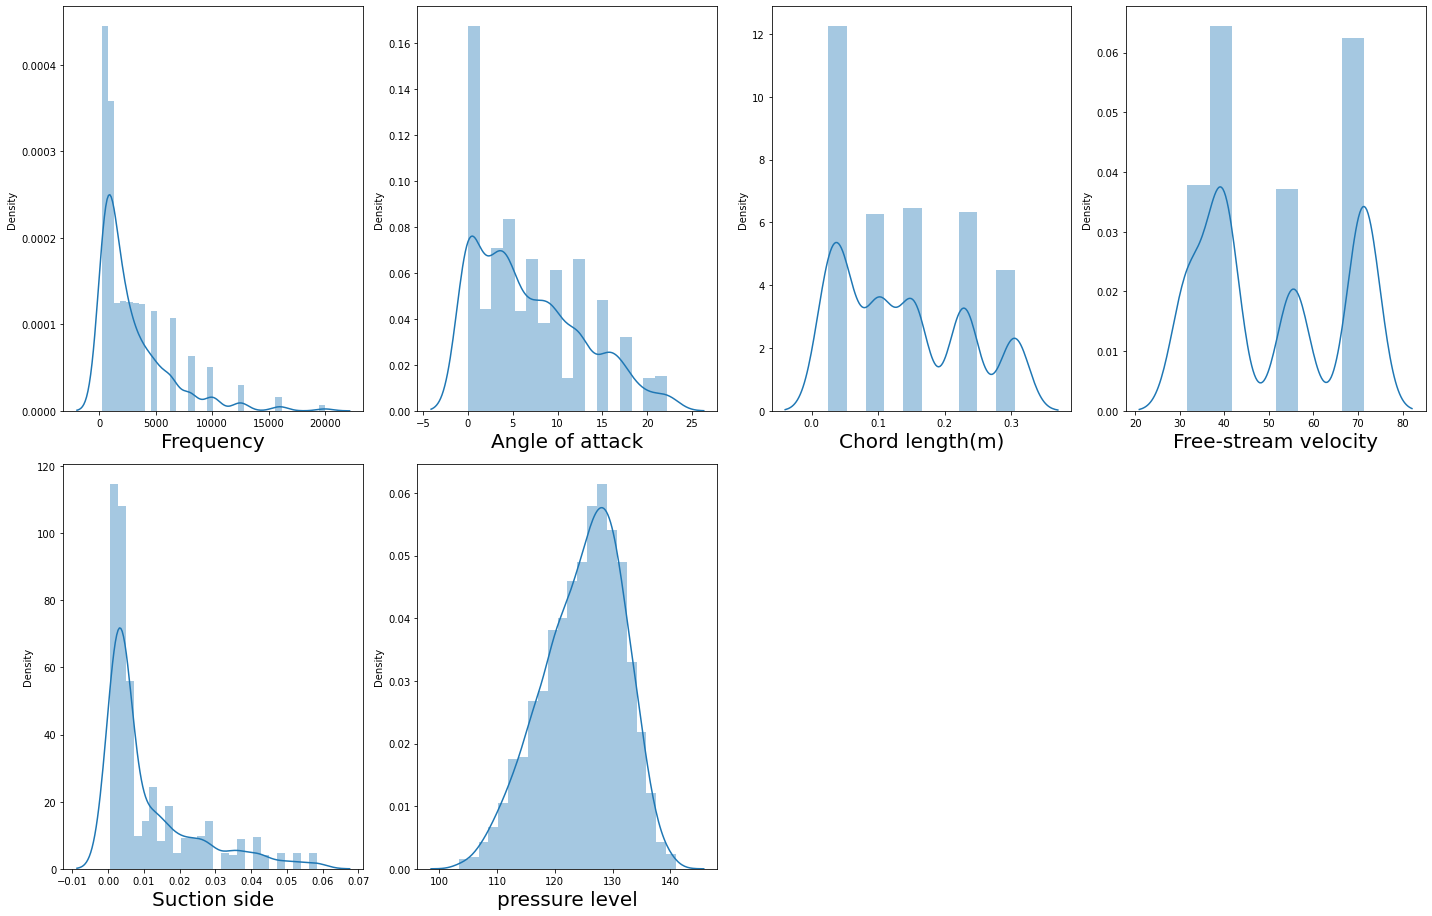

In [11]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=6 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

'''Distribution of the dataset'''

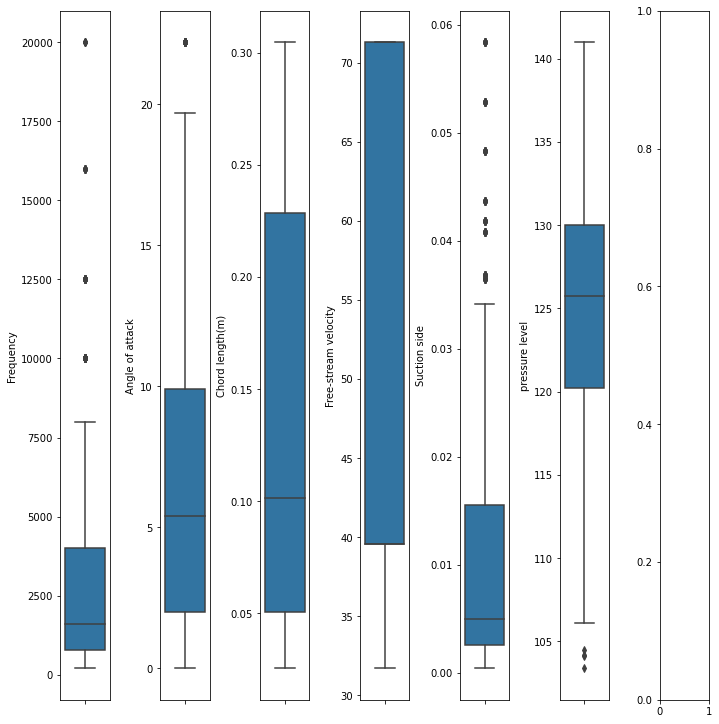

In [12]:
# create a box plot
fig , ax = plt.subplots(ncols=7,figsize=(10,10))
index=0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col,data= df, ax = ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0) 

<AxesSubplot:xlabel='Frequency', ylabel='Frequency'>

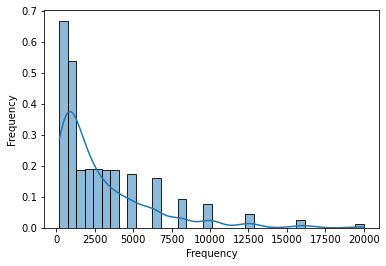

In [13]:
sns.histplot(data=df, x="Frequency",kde=True,stat="frequency")

In [14]:
def detectoutliers(column):
    
    numbers = sorted(column)
    
    #outliers=[]
    
    Q1 = np.quantile(column, .25) #quantile() method calculates the quantile of the values in a given axis
    Q3 = np.quantile(column, .75) #Compute the q-th percentile of the data along the specified axis.
    Q2 = np.quantile(column, .50) 
    
    
    #print('Q1,Q3 : ',Q1,Q3)
    
    
    IQR = Q3-Q1
    lower_bound_val = Q1 -(1.5 * IQR) 
    upper_bound_val = Q3 +(1.5 * IQR) 
    
    no_outliers = column[(column > Q1 - 1.5*IQR) &  (column < Q3 + 1.5*IQR)]

    outliers = column [(column < 1 - 1.5*IQR) |  (column > Q3 + 1.5*IQR)]
    
    lower_fence_otlier=column [(Q1 - 1.5*IQR >= column)]
    
    upper_fence_otlier=column [(column >= Q3 + 1.5*IQR)]

    print("Quantile-1 (Q1): ",Q1, "\n")
    print("Quantile-2-median (Q2): ",Q2, "\n")
    print("Quantile-3 (Q3): ",Q3, "\n")
    print("Inter Quantile Range (IQR): ",IQR, "\n")
    
    print('lowerBound : ',lower_bound_val,"\n")
    print('upperBound : ',upper_bound_val,"\n")
    
    print("Maximum value",column.max())
    print("Minimum value",column.min())
    

    
    return lower_bound_val,upper_bound_val #,outliers

In [15]:
detectoutliers(df["Frequency"])

Quantile-1 (Q1):  800.0 

Quantile-2-median (Q2):  1600.0 

Quantile-3 (Q3):  4000.0 

Inter Quantile Range (IQR):  3200.0 

lowerBound :  -4000.0 

upperBound :  8800.0 

Maximum value 20000
Minimum value 200


(-4000.0, 8800.0)

In [16]:
detectoutliers(df["Angle of attack"])

Quantile-1 (Q1):  2.0 

Quantile-2-median (Q2):  5.4 

Quantile-3 (Q3):  9.9 

Inter Quantile Range (IQR):  7.9 

lowerBound :  -9.850000000000001 

upperBound :  21.75 

Maximum value 22.2
Minimum value 0.0


(-9.850000000000001, 21.75)

In [17]:
detectoutliers(df["Chord length(m)"])

Quantile-1 (Q1):  0.0508 

Quantile-2-median (Q2):  0.1016 

Quantile-3 (Q3):  0.2286 

Inter Quantile Range (IQR):  0.1778 

lowerBound :  -0.21590000000000004 

upperBound :  0.4953000000000001 

Maximum value 0.3048
Minimum value 0.0254


(-0.21590000000000004, 0.4953000000000001)

In [18]:
detectoutliers(df["Free-stream velocity"])

Quantile-1 (Q1):  39.6 

Quantile-2-median (Q2):  39.6 

Quantile-3 (Q3):  71.3 

Inter Quantile Range (IQR):  31.699999999999996 

lowerBound :  -7.949999999999996 

upperBound :  118.85 

Maximum value 71.3
Minimum value 31.7


(-7.949999999999996, 118.85)

In [19]:
detectoutliers(df["Suction side"])

Quantile-1 (Q1):  0.00253511 

Quantile-2-median (Q2):  0.00495741 

Quantile-3 (Q3):  0.0155759 

Inter Quantile Range (IQR):  0.01304079 

lowerBound :  -0.017026075 

upperBound :  0.035137085 

Maximum value 0.0584113
Minimum value 0.000400682


(-0.017026075, 0.035137085)

In [20]:
detectoutliers(df["pressure level"])

Quantile-1 (Q1):  120.191 

Quantile-2-median (Q2):  125.721 

Quantile-3 (Q3):  129.9955 

Inter Quantile Range (IQR):  9.80449999999999 

lowerBound :  105.48425000000002 

upperBound :  144.70225 

Maximum value 140.987
Minimum value 103.38


(105.48425000000002, 144.70225)

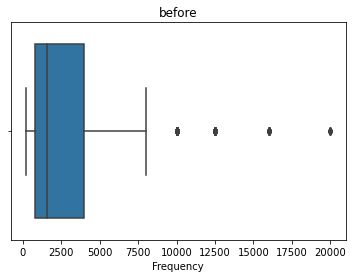

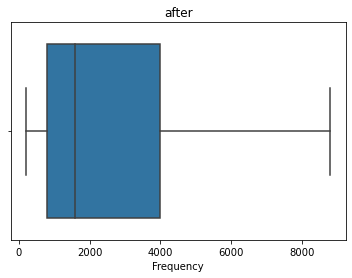

In [21]:
#Outlier Treatment:


sns.boxplot(df["Frequency"])
plt.title("before")
plt.show()

def otlier_treat(df,column):
    
    for i in df[column]:
        Q1 = np.quantile(df[column], .25) 
        Q3 = np.quantile(df[column], .75) 
        Q2 = np.quantile(df[column], .50)
        
        IQR = Q3-Q1
        lower = Q1 -(1.5 * IQR) 
        upper = Q3 +(1.5 * IQR)
        
        if i > upper :
            df[column]=df[column].replace(i,upper)
            if i < lower:
                df[column]=df[column].replace(i,lower)
                
            
            
otlier_treat(df,"Frequency")  

sns.boxplot(df["Frequency"])
plt.title("after")
plt.show()

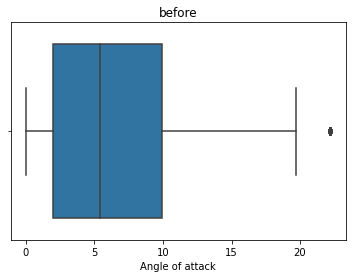

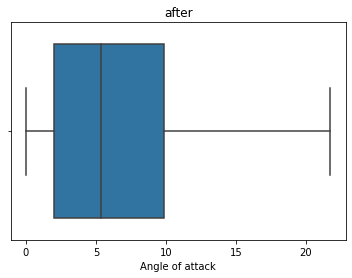

In [22]:
sns.boxplot(df["Angle of attack"])
plt.title("before")
plt.show()

       
# Call the function            
otlier_treat(df,"Angle of attack")  

sns.boxplot(df["Angle of attack"])
plt.title("after")
plt.show()

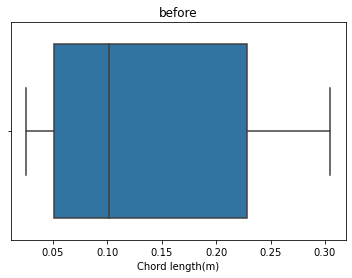

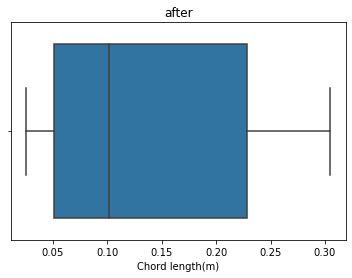

In [23]:
sns.boxplot(df["Chord length(m)"])
plt.title("before")
plt.show()

       
# Call the function            
otlier_treat(df,"Chord length(m)")  

sns.boxplot(df["Chord length(m)"])
plt.title("after")
plt.show()

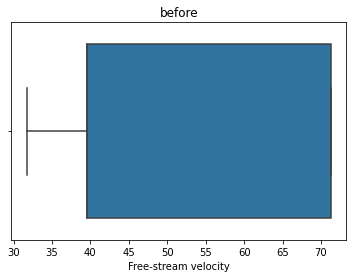

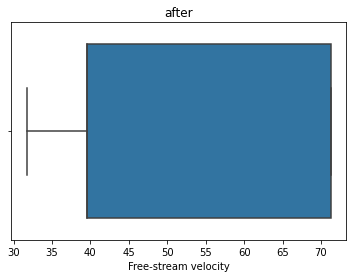

In [24]:
sns.boxplot(df["Free-stream velocity"])
plt.title("before")
plt.show()

       
# Call the function            
otlier_treat(df,"Free-stream velocity")  

sns.boxplot(df["Free-stream velocity"])
plt.title("after")
plt.show()

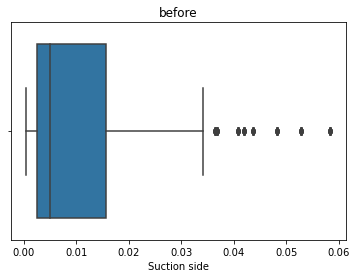

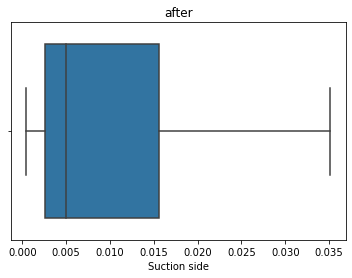

In [25]:
sns.boxplot(df["Suction side"])
plt.title("before")
plt.show()

       
# Call the function            
otlier_treat(df,"Suction side")  

sns.boxplot(df["Suction side"])
plt.title("after")
plt.show()

'Distribution of the dataset'

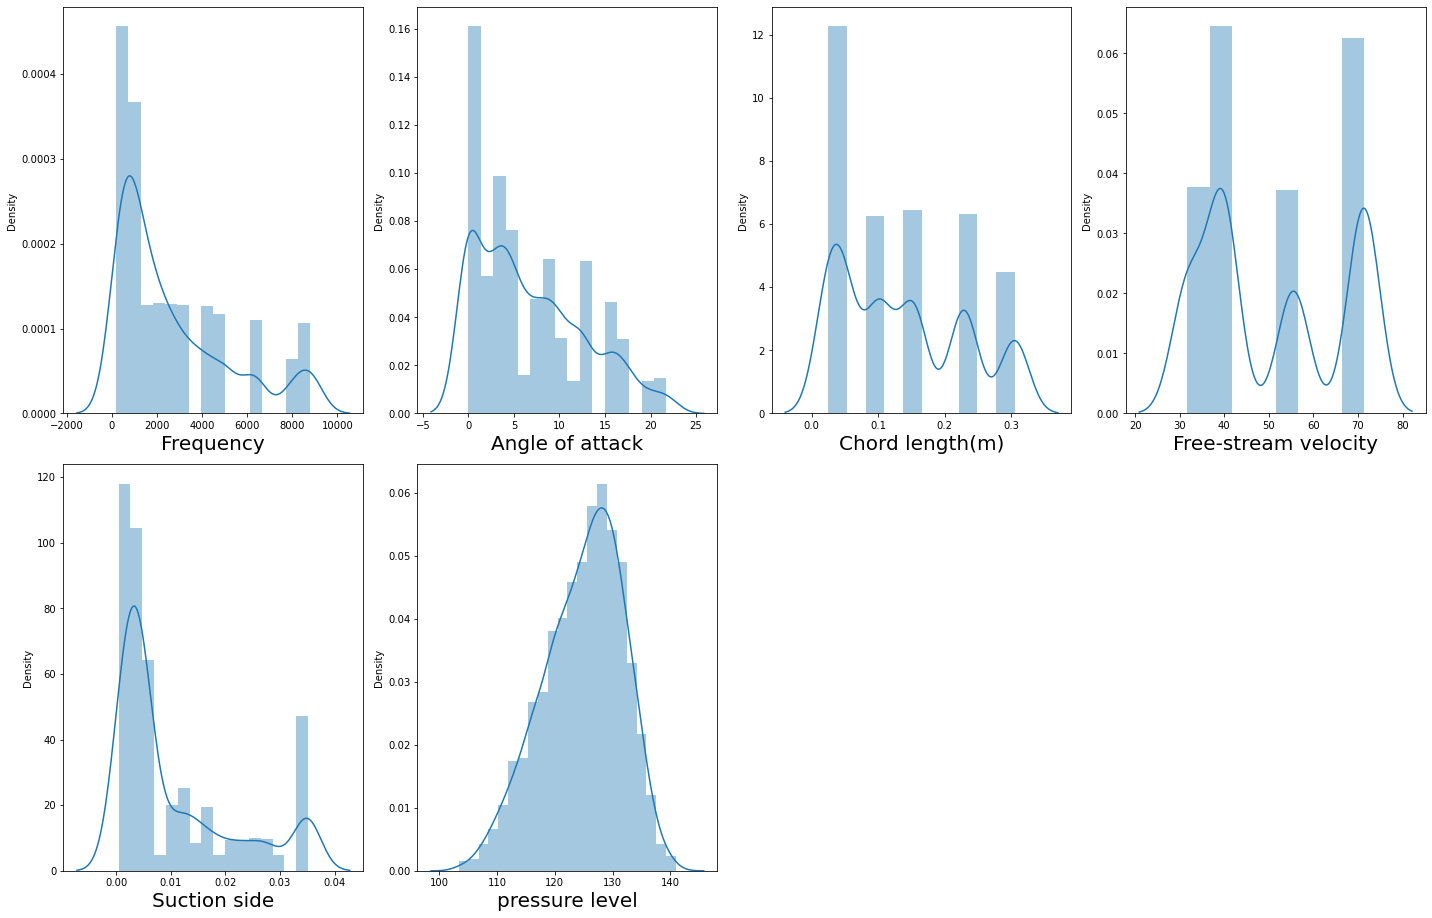

In [26]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=6 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

'''Distribution of the dataset'''
# after outlier tratment

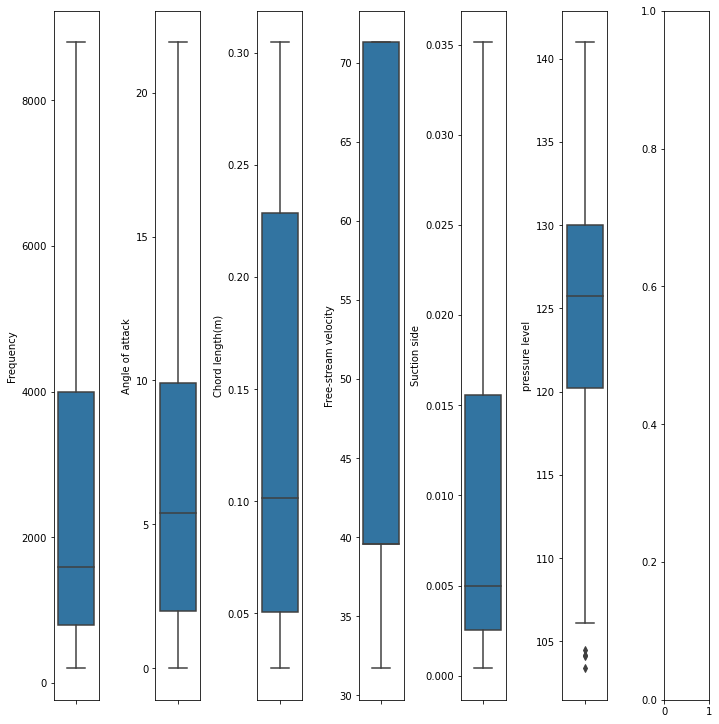

In [27]:
# create a box plot
fig , ax = plt.subplots(ncols=7,figsize=(10,10))
index=0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col,data= df, ax = ax[index])
    index += 1
    
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0) 

## **@**Feature Selection

In [28]:
corr=df.corr()
corr

,Frequency,Angle of attack,Chord length(m),Free-stream velocity,Suction side,pressure level
Frequency,1.000000,-0.274280,0.003938,0.117396,-0.252480,-0.416397
Angle of attack,-0.274280,1.000000,-0.505037,0.058541,0.817985,-0.156645
Chord length(m),0.003938,-0.505037,1.000000,0.003787,-0.255371,-0.236162
Free-stream velocity,0.117396,0.058541,0.003787,1.000000,0.010025,0.125103
Suction side,-0.252480,0.817985,-0.255371,0.010025,1.000000,-0.283860
pressure level,-0.416397,-0.156645,-0.236162,0.125103,-0.283860,1.000000


'Here, I am checking each and every feature correlation by using Heatmap'

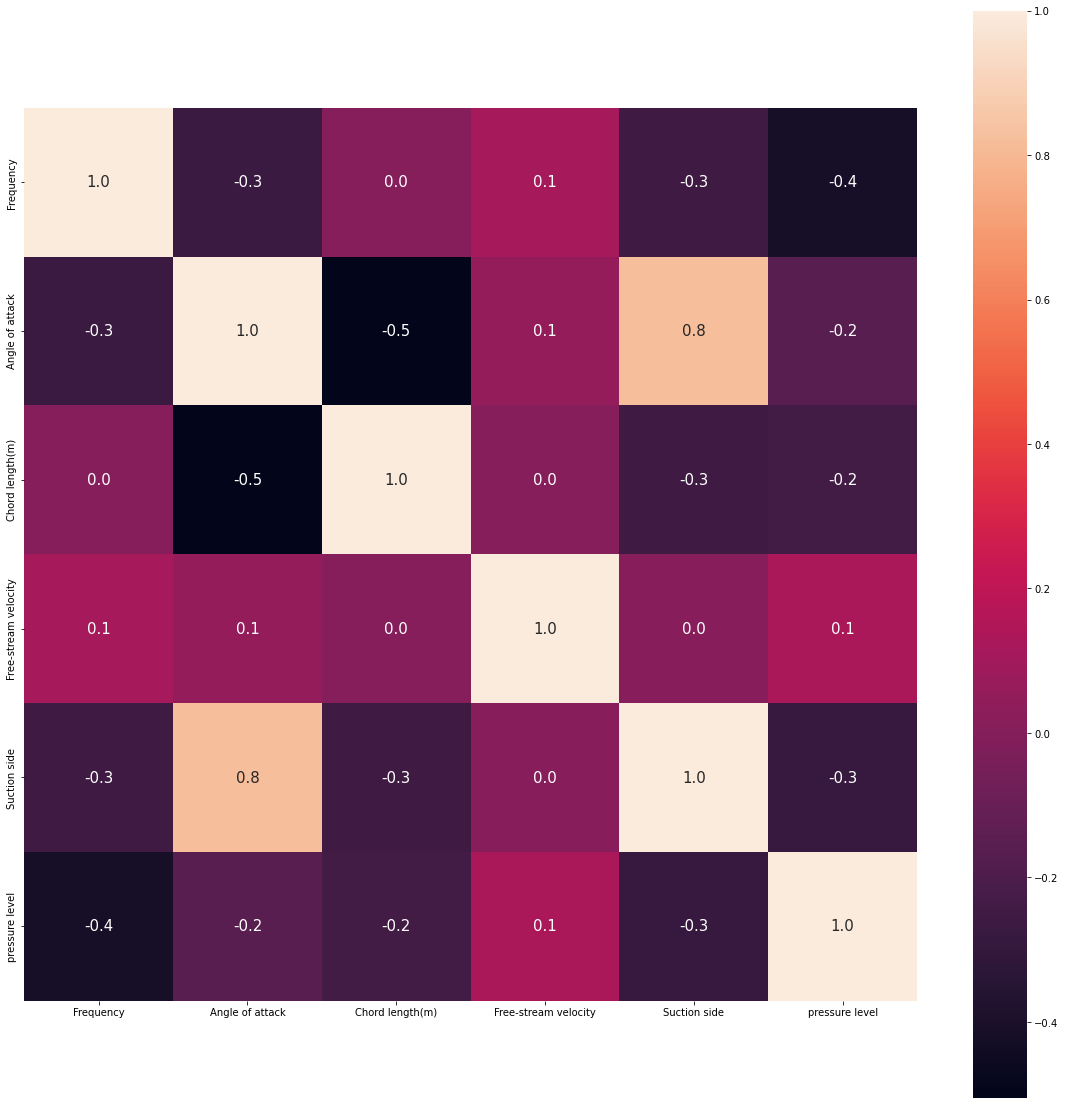

In [29]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15})

'''Here, I am checking each and every feature correlation by using Heatmap'''

In [30]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

# sklearn lib. 

from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression


In [31]:
X=df.drop(labels=['pressure level'],axis=1)
y=df["pressure level"]

'''Separte the independent Feature and the target feature for model cration'''

'Separte the independent Feature and the target feature for model cration'

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = X_scaled

vif = pd.DataFrame()
print(vif)
print("\n",70*"=")

vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
print("VIF of the features to reduce multicolinearity","\n",vif["VIF"])
print("\n",70*"=")

'''How the features are related to each other, when the features are highly corelated to each other
according to linear assumpution drop those features , becaues these are causes overfitting issues'''

print("Shape: " ,variables.shape)

# all variables are in moderate condiotions

NameError: name 'X_scaled' is not defined

In [33]:
## no multi colinearity


In [34]:
X

,Frequency,Angle of attack,Chord length(m),Free-stream velocity,Suction side
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
...,...,...,...,...,...
1498,2500,15.6,0.1016,39.6,0.035137
1499,3150,15.6,0.1016,39.6,0.035137
1500,4000,15.6,0.1016,39.6,0.035137
1501,5000,15.6,0.1016,39.6,0.035137


In [35]:
y.head()

0    126.201
1    125.201
2    125.951
3    127.591
4    127.461
Name: pressure level, dtype: float64

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

'''"For Liner regression algorithm scaling the data set,
to give equal importance to all features"'''



'"For Liner regression algorithm scaling the data set,\nto give equal importance to all features"'

In [38]:
X_scaled

array([[-0.751665  , -1.14937599,  1.79929926,  1.31293526, -0.69812808],
       [-0.67188388, -1.14937599,  1.79929926,  1.31293526, -0.69812808],
       [-0.57215748, -1.14937599,  1.79929926,  1.31293526, -0.69812808],
       ...,
       [ 0.5248329 ,  1.49781407, -0.37373954, -0.72334483,  2.26262679],
       [ 0.92373849,  1.49781407, -0.37373954, -0.72334483,  2.26262679],
       [ 1.44231576,  1.49781407, -0.37373954, -0.72334483,  2.26262679]])

In [39]:
scaler.inverse_transform(X_scaled) # inverse transfor for the 

array([[8.0000000e+02, 0.0000000e+00, 3.0480000e-01, 7.1300000e+01,
        2.6633700e-03],
       [1.0000000e+03, 0.0000000e+00, 3.0480000e-01, 7.1300000e+01,
        2.6633700e-03],
       [1.2500000e+03, 0.0000000e+00, 3.0480000e-01, 7.1300000e+01,
        2.6633700e-03],
       ...,
       [4.0000000e+03, 1.5600000e+01, 1.0160000e-01, 3.9600000e+01,
        3.5137085e-02],
       [5.0000000e+03, 1.5600000e+01, 1.0160000e-01, 3.9600000e+01,
        3.5137085e-02],
       [6.3000000e+03, 1.5600000e+01, 1.0160000e-01, 3.9600000e+01,
        3.5137085e-02]])

In [40]:
pd.DataFrame(scaler.inverse_transform(X_scaled)).head()

,0,1,2,3,4
0,800.0,0.0,0.3048,71.3,0.002663
1,1000.0,0.0,0.3048,71.3,0.002663
2,1250.0,0.0,0.3048,71.3,0.002663
3,1600.0,0.0,0.3048,71.3,0.002663
4,2000.0,0.0,0.3048,71.3,0.002663


In [41]:
X.head()

,Frequency,Angle of attack,Chord length(m),Free-stream velocity,Suction side
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,x_test,y_train,y_test = train_test_split(
    X_scaled,y,test_size = 0.2,random_state=50) 

'''Spliting the data for training data and testing data 
for train and evaluation the model'''
#cross_validation

'''X_scaled : independent variable after scaling,
y: dependent variable'''

'X_scaled : independent variable after scaling,\ny: dependent variable'

In [44]:
print("Train data column {a} and row {b}".format(a=X_train.shape[0],b=X_train.shape[1]))
print("Test data column {a} and row {b}".format(a=x_test.shape[0],b=x_test.shape[1]))      
      
      


Train data column 1202 and row 5
Test data column 301 and row 5


In [45]:
y_test.shape

(301,)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
model_linear = LinearRegression()

model_linear.fit(X_train,y_train)

''' Fit the train dataset in mopdel for training'''

' Fit the train dataset in mopdel for training'

In [49]:
print("Linear model training score",model_linear.score(X_train,y_train)*100)
print("Linear model testing score",model_linear.score(x_test, y_test)*100)

''' model show that its overfitting, because the test score is  less than train score
and it indicate that low bias , high variance'''

Linear model training score 53.52819523396399
Linear model testing score 48.89286227183931


' model show that its overfitting, because the test score is  less than train score\nand it indicate that low bias , high variance'

In [50]:
X_train

array([[-0.27297829, -0.0124418 , -0.37373954,  0.29800701, -0.46558634],
       [-0.97106308,  2.54141784, -1.18862909, -0.72334483,  1.14717946],
       [-0.87133668,  2.19354992, -0.91699924, -0.72334483,  2.26262679],
       ...,
       [-0.67188388, -0.64030098,  1.79929926, -0.72334483, -0.48897153],
       [ 0.18576314, -0.58939348, -0.37373954,  0.29800701, -0.73937241],
       [ 1.44231576, -0.64030098,  1.79929926,  1.31293526, -0.55280601]])

In [271]:
(0.5352819523396399-0.4889286227183931)*100

4.635332962124683

In [224]:
y_hat_linear_tr=model_linear.predict(X_train)

print("Train data score",model_linear.score(X_train, y_train)*100)
print("Train data r2_score",r2_score(y_train,y_hat_linear_tr)*100)
print("Train data MSE:",mean_squared_error(y_train,y_hat_linear_tr))
print("Train data MAE:",mean_absolute_error(y_train,y_hat_linear_tr))
print("Train data RMSE:",np.sqrt(mean_squared_error(y_train,y_hat_linear_tr)))

Train data score 53.52819523396399
Train data r2_score 53.52819523396399
Train data MSE: 21.954493088759037
Train data MAE: 3.5677613024576167
Train data RMSE: 4.685562195591799


**r2-squared shows how well the data fit the regression model (the goodness of fit),R-Squared (R² or the coefficient of determination), range=0 to 1**

In [227]:
linear_train=pd.DataFrame({'Real Values train (actual)':y_train, 'Predicted Values train (y_hat) ':y_hat_linear_tr})
linear_train.head()

,Real Values train (actual),Predicted Values train (y_hat)
1358,129.653,128.422192
1226,117.386,122.479224
952,128.444,120.807678
578,119.137,123.768018
1254,126.170,134.847216


In [253]:
y_hat_linear_ts=model_linear.predict(x_test)

print("Test data score",model_linear.score(x_test, y_test))
print("Test data r2_score",r2_score(y_test,y_hat_linear_ts)) # (coefficient of determination) regression score function.(1.0)
print("Test data MSE:",mean_squared_error(y_test,y_hat_linear_ts))
print("Test data MAE:",mean_absolute_error(y_test,y_hat_linear_ts))
print("Test data RMSE:", np.sqrt(mean_squared_error(y_test,y_hat_linear_ts)))

Test data score 0.4889286227183931
Test data r2_score 0.4889286227183931
Test data MSE: 24.951848765037813
Test data MAE: 3.82021471106485
Test data RMSE: 4.995182555726849


In [112]:
linear_test=pd.DataFrame({'Real Values test':y_test, 'Predicted Values test ':y_hat_linear_ts})
linear_test.head()

,Real Values test,Predicted Values test
968,130.787,125.212987
9,119.541,118.860474
1468,110.317,118.188460
1150,117.396,129.239285
880,127.625,123.981064


In [228]:
from sklearn.model_selection import cross_validate

In [250]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(model_linear, X_train, y_train, cv=5,scoring=('neg_mean_squared_error'))
cv_results.mean()

-22.200095843417404

In [251]:
import numpy as np
np.mean(cv_results)

-22.200095843417404

In [252]:

# 1st parameter is estimater jo hmne bnaya h regression
# 2nd aayga training and test dataset
## 3rd  Scoring parameter 
cross_val_score(model_linear,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mse=cross_val_score(model_linear,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
np.mean(mse)

-22.200095843417404

In [233]:
scores = cross_validate(model_linear, X, y, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
print(scores['test_neg_mean_squared_error'])###Random Forest:

[ -8.37178769 -18.65302363 -23.40185407 -52.61555001 -24.4668215 ]


In [114]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0) 

In [115]:
model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)

RandomForestRegressor()

In [116]:
print("Forest model training score",model_rf.score(x_train,y_train))
print("Forest model testing score",model_rf.score(x_test, y_test))

Forest model training score 0.9864337322258254
Forest model testing score 0.9228266120164866


In [118]:
y_rf_tr=model_rf.predict(x_train)

print("Train data score",model_rf.score(x_train, y_train))
print("Train data r2_score",r2_score(y_train,y_rf_tr))
print("Train data MSE:",mean_squared_error(y_train,y_rf_tr))
print("Train data MAE:",mean_absolute_error(y_train,y_rf_tr))
print("Train data RMSE:",np.sqrt(mean_squared_error(y_train,y_rf_tr)))



Train data score 0.9864337322258254
Train data r2_score 0.9864337322258254
Train data MSE: 0.6469733730124861
Train data MAE: 0.5183856383330613
Train data RMSE: 0.8043465503204984


In [120]:
rf_train=pd.DataFrame({"Real Values train":y_train, "Predicted Values train" :y_rf_tr})
rf_train.head()

,Real Values train,Predicted Values train
1058,127.206,127.85421
408,136.284,136.19774
703,117.504,117.96405
1279,122.341,122.33228
140,114.042,114.18961


In [119]:
y_rf_ts=model_rf.predict(x_test)

print("Test data score",model_rf.score(x_test, y_test))
print("Test data r2_score",r2_score(y_test,y_rf_ts)) # (coefficient of determination) regression score function.(1.0)
print("Test data MSE:",mean_squared_error(y_test,y_rf_ts))
print("Test data MAE:",mean_absolute_error(y_test,y_rf_ts))
print("Test data RMSE:", np.sqrt(mean_squared_error(y_test,y_rf_ts)))

Test data score 0.9228266120164866
Test data r2_score 0.9228266120164866
Test data MSE: 3.6301597582725824
Test data MAE: 1.337132994779304
Test data RMSE: 1.9052978135379735


In [121]:
rf_test=pd.DataFrame({'Real Values test':y_test, 'Predicted Values test ':y_rf_ts})
rf_test.head()

,Real Values test,Predicted Values test
968,130.787,131.504557
9,119.541,118.756350
1468,110.317,111.785170
1150,117.396,116.884960
880,127.625,125.855320


In [267]:
from sklearn.linear_model import Lasso
lasso=Lasso()
parameter={'alpha':[1,2,5,10,30,40,50,60,4,6,9,11]}
lassocv=GridSearchCV(lasso,parameter,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 30, 40, 50, 60, 4, 6, 9, 11]},
             scoring='neg_mean_squared_error')

In [268]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-30.567278417892574


In [274]:
from sklearn.linear_model import Lasso
lasso=Lasso()
parameter={'alpha':range(1,80)}
lassocv=GridSearchCV(lasso,parameter,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': range(1, 80)},
             scoring='neg_mean_squared_error')

In [273]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 0}
-22.200095843417404


In [262]:
lassocv

GridSearchCV(cv=5, estimator=Lasso(), param_grid={'alpha': range(0, 11)},
             scoring='neg_mean_squared_error')

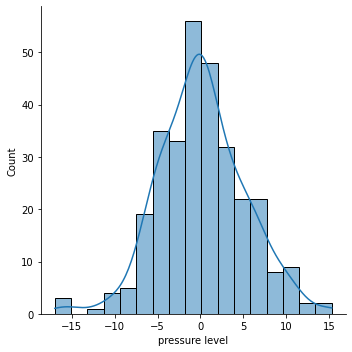

In [266]:
lasso_pred=lassocv.predict(x_test)
sns.displot(lasso_pred-y_test,kde=True)

### **@** to achive better accuracy do feture importance and hyperparameter in Randomforest Regression

In [123]:
def feat_importance(m,df):
    importance = m.feature_importances_
    importance = pd.DataFrame(importance,index=df.columns,columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)




In [124]:
importance = feat_importance(model_rf,X)
importance[:]*100

,Importance
Suction side,41.395696
Frequency,38.178818
Chord length(m),10.354877
Angle of attack,5.065545
Free-stream velocity,5.005063


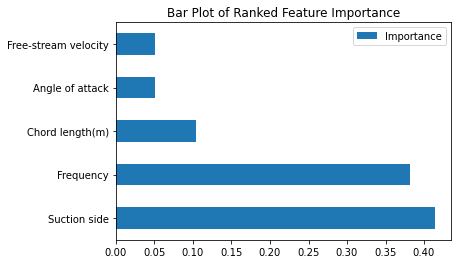

In [125]:
#importance.plot(kind='bar')
importance.plot(kind='barh')

plt.title("Bar Plot of Ranked Feature Importance")
plt.show()

In [129]:
#Discarding features with feature coefficients less than 0.01

to_keep = importance[importance['Importance'] > 0.01].index

X_new = X[to_keep].copy()

X_new.columns

Index(['Suction side', 'Frequency', 'Chord length(m)', 'Angle of attack',
       'Free-stream velocity'],
      dtype='object')

In [130]:
X_new.head()

,Suction side,Frequency,Chord length(m),Angle of attack,Free-stream velocity
0,0.002663,800,0.3048,0.0,71.3
1,0.002663,1000,0.3048,0.0,71.3
2,0.002663,1250,0.3048,0.0,71.3
3,0.002663,1600,0.3048,0.0,71.3
4,0.002663,2000,0.3048,0.0,71.3


In [131]:
x_train_f,x_test_f,y_train_f,y_test_f = train_test_split(X_new,y,test_size = 0.30, random_state= 355)

In [132]:
#let's first visualize the tree on the data without doing any pre processing

model_rf_new = RandomForestRegressor()
model_rf_new.fit(x_train_f, y_train_f)



RandomForestRegressor()

In [133]:
y_rf_tr_n=model_rf_new.predict(x_train_f)

print("Train data score",model_rf_new.score(x_train_f, y_train_f))
print("Train data r2_score",r2_score(y_train_f,y_rf_tr_n))
print("Train data MSE:",mean_squared_error(y_train_f,y_rf_tr_n))
print("Train data MAE:",mean_absolute_error(y_train_f,y_rf_tr_n))
print("Train data RMSE:",np.sqrt(mean_squared_error(y_train_f,y_rf_tr_n)))

Train data score 0.9850454645969888
Train data r2_score 0.9850454645969888
Train data MSE: 0.6890441936427539
Train data MAE: 0.5422960446089123
Train data RMSE: 0.8300868590953322


In [134]:
y_rf_ts_n=model_rf_new.predict(x_test_f)

print("Test data score",model_rf_new.score(x_test_f, y_test_f))
print("Test data r2_score",r2_score(y_test_f,y_rf_ts_n)) # (coefficient of determination) regression score function.(1.0)
print("Test data MSE:",mean_squared_error(y_test_f,y_rf_ts_n))
print("Test data MAE:",mean_absolute_error(y_test_f,y_rf_ts_n))
print("Test data RMSE:", np.sqrt(mean_squared_error(y_test_f,y_rf_ts_n)))

Test data score 0.921793956967584
Test data r2_score 0.921793956967584
Test data MSE: 3.9884902320415154
Test data MAE: 1.3844702080033824
Test data RMSE: 1.9971204851088769


In [135]:
random_param = {
    
    "n_estimators":[10,20,30], 
    'criterion': ["squared_error","poisson", "absolute_error"], 
    'max_depth' : [3,4,5,6],
    'min_samples_leaf' : [0.04,0.06,0.08],
    'min_samples_split': [2,3,4],
    "bootstrap":[True,False] 
    
}

'''Create dict the parameter of the randomforest'''

'Create dict the parameter of the randomforest'

In [136]:
random_search = RandomizedSearchCV(estimator=model_rf_new,
                     param_distributions=random_param,random_state=42,
                     cv=5,
                    n_jobs =-1,verbose=2)

''' By using randomized search cv randomly selcted the data points and create every combination ,and selct the parameter values'''

' By using randomized search cv randomly selcted the data points and create every combination ,and selct the parameter values'

In [137]:
random_search.fit(x_train_f,y_train_f)

'''fit the train data in it, and using CV reduce overfitting'''

Fitting 5 folds for each of 10 candidates, totalling 50 fits


'fit the train data in it, and using CV reduce overfitting'

In [138]:
best_parameters = random_search.best_params_
print(best_parameters)

{'n_estimators': 20, 'min_samples_split': 4, 'min_samples_leaf': 0.04, 'max_depth': 5, 'criterion': 'absolute_error', 'bootstrap': True}


In [139]:
print("Mean cross-validated score of the best_estimator:",random_search.best_score_ )

Mean cross-validated score of the best_estimator: 0.5375407268914973


In [140]:
model_3=RandomForestRegressor(n_estimators= 20, min_samples_split= 4, min_samples_leaf= 0.04, max_depth= 5, criterion= 'absolute_error', bootstrap= True)

model_3.fit(x_train_f,y_train_f)

RandomForestRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=0.04, min_samples_split=4,
                      n_estimators=20)

In [141]:
y_hat_5=model_3.predict(x_train_f)

print("Train data score",model_3.score(x_train_f,y_train_f))
print("Train data r2_score",r2_score(y_train_f,y_hat_5))
print("Train data MSE:",mean_squared_error(y_train_f,y_hat_5))
print("Train data MAE:",mean_absolute_error(y_train_f,y_hat_5))
print("Train data RMSE:",np.sqrt(mean_squared_error(y_train_f,y_hat_5)))

Train data score 0.5682682162796563
Train data r2_score 0.5682682162796563
Train data MSE: 19.892445386409822
Train data MAE: 3.3869918013307987
Train data RMSE: 4.4600947732542435


In [142]:
y_hat_6=model_3.predict(x_test_f)

print("Test data score",model_3.score(x_test_f, y_test_f))
print("Test data r2_score",r2_score(y_test_f,y_hat_6)) # (coefficient of determination) regression score function.(1.0)
print("Test data MSE:",mean_squared_error(y_test_f,y_hat_6))
print("Test data MAE:",mean_absolute_error(y_test_f,y_hat_6))
print("Test data RMSE:", np.sqrt(mean_squared_error(y_test_f,y_hat_6)))

Test data score 0.5768387171115643
Test data r2_score 0.5768387171115643
Test data MSE: 21.5811282342863
Test data MAE: 3.6475648004434587
Test data RMSE: 4.645549293063878


In [145]:
range(0,10,2)

range(0, 10, 2)

In [ ]:
for i in range(10):
    print()

In [ ]:
R_model = RandomForestClassifier()
R_model.fit(X, y)


def fea_importance(m,df):
    importance = m.feature_importances_*100
    final_df=pd.DataFrame({"Feature": pd.DataFrame(df).columns,"Importance": importance})
    Final_df=final_df.sort_values("Importance")
    return Final_df
    
# Create a function which will help to find the features

fea_importance(R_model,X)

#importance.plot(kind='bar')
fea_importance(R_model,X).plot(kind='barh')

plt.title("Bar Plot of Ranked Feature Importance")
plt.show()